<a href="https://colab.research.google.com/github/Ayush-Debnath/tinyLLM/blob/main/tokenizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><i><h1>BUILDING A LLM</H1>from sctratch.....</i></b>

<i><H3>Data: The Verdict</h3></i> <br>
loctaion: /content/drive/MyDrive/LLMDATA/the-verdict.txt

<h3><i>Tokenizer</i></h3>

<i>Step 1:</i> Splitting the test in individual words and subword tokens.<br>
<i>Step 2:</i> Convert tokens into token IDs<br>
<i>Step 3:</i> Encode token IDs into vector representations

In [1]:
with open("/content/drive/MyDrive/LLMDATA/the-verdict.txt", "r",encoding="utf-8") as f:
  raw_text=f.read()
print("total number of characters:", len(raw_text))
print(raw_text[:99])


total number of characters: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [2]:
import re

<h10>Preprocessing

In [3]:
preprocessed=re.split(r'([,.:;?_!"()\']|--|\s)',raw_text)
preprocessed=[item.strip() for item in preprocessed if item.strip()]
print(preprocessed[:50])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in', 'the', 'height', 'of', 'his', 'glory', ',', 'he', 'had', 'dropped', 'his', 'painting', ',', 'married', 'a', 'rich', 'widow', ',', 'and', 'established', 'himself']


In [4]:
print(len(preprocessed))

4690


In [5]:
all_words=sorted(set(preprocessed))
print("vocab size: ",len(all_words))

vocab size:  1130


In [6]:
vocab={token: integer for integer,token in enumerate(all_words)}

In [7]:
for i,item in enumerate(vocab.items()):
  print(item)
  if i>=50:
    break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)


In [8]:
class SimpleTokenizerV1:
  def __init__(self,vocab):
    self.str_to_int=vocab
    self.int_to_str={i:s for s,i in vocab.items()}

  def encode(self,text):
    # Reverted the incorrect ']' to ''' and removed the erroneous escape character
    preprocessed=re.split(r'([,.:;?_!"()\']|--|\s)',text)

    preprocessed=[
        item.strip() for item in preprocessed if item.strip()
    ]
    ids=[self.str_to_int[s] for s in preprocessed]
    return ids

  def decode(self,ids):
    text=" ".join([self.int_to_str[i] for i in ids])
    text=re.sub(r'\s+([,.?!"()\'])',r'\1',text)
    return text

In [9]:
tokenizer=SimpleTokenizerV1(vocab)
text=""""It's the last he painted, you know," Mrs. Gisburn said with pardonable pride."""
ids=tokenizer.encode(text)
print(ids)

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


In [10]:
tokenizer.decode(ids)

'" It\' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.'

Adding<br>
<|unk|> --> unknown token<br>
<|endoftext|> --> end of text token


In [11]:
all_tokens=sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>","<|unk|>"])

In [12]:
vocab={token:integer for integer, token in enumerate(all_tokens)}

In [13]:
len(vocab.items())

1132

In [14]:
for i,item in enumerate(list(vocab.items())[-5:]):
  print(item)

('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


In [15]:
class SimpleTokenizerV2:
  def __init__(self,vocab):
    self.str_to_int=vocab
    self.int_to_str={i:s for s,i in vocab.items()}

  def encode(self,text):
    # Fix: Added missing closing parenthesis for the regex pattern
    preprocessed=re.split(r'([,.:;?_!"()\']|--|\s)',text)
    preprocessed=[item.strip() for item in preprocessed if item.strip()]
    preprocessed=[
        item if item in self.str_to_int else "<|unk|>" for item in preprocessed
    ]

    ids=[self.str_to_int[s] for s in preprocessed]
    return ids

  def decode(self,ids):
    text=" ".join([self.int_to_str[i] for i in ids])
    text=re.sub(r'\s+([,.:;?!"()\'])',r'\1',text)
    return text


In [16]:
tokenizer=SimpleTokenizerV2(vocab)
text1="Hello, do you like some tea?"
text2="In the sunlit terraces of the palace."

text="<|endoftext|> ".join((text1,text2))

In [17]:
text

'Hello, do you like some tea?<|endoftext|> In the sunlit terraces of the palace.'

In [18]:
tokenizer.encode(text)

[1131,
 5,
 355,
 1126,
 628,
 910,
 975,
 10,
 1130,
 55,
 988,
 956,
 984,
 722,
 988,
 1131,
 7]

In [19]:
print(tokenizer.decode(tokenizer.encode(text)))

<|unk|>, do you like some tea? <|endoftext|> In the sunlit terraces of the <|unk|>.


<h3><i>BYTE PAIR ENCODING(BPE)</i></h3><br>
It is a subword tokenization algorithm. Most common pair of consecutive bytes of data is replaced witha byte that does not occur in data.

In [20]:
!pip install tiktoken

In [21]:
import importlib
import tiktoken

print("tiktoken version: ",importlib.metadata.version("tiktoken") )

tiktoken version:  0.12.0


In [22]:
tokenizer=tiktoken.get_encoding("gpt2")

In [23]:
text=(
    "Hello, do you like tea? <|endoftext|> In the sunlit terraces"
    "of someunknownPlace"
)

integers=tokenizer.encode(text,allowed_special={"<|endoftext|>"})
print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 34680, 27271]


<h3><i>CREATING INPUT-TARGETT PAIRS</i></h3><br>

we implement a dataloader that fetches the input-target pairs using a sliding window approach

In [24]:
with open ("/content/drive/MyDrive/LLMDATA/the-verdict.txt","r",encoding="utf-8") as f:
  raw_text=f.read()
enc_text=tokenizer.encode(raw_text)
print(len(enc_text))

5145


In [25]:
enc_sample=enc_text[50:]

In [26]:
context_size=4 #length of the input
"""The context_size of 4 means that the model is trained to look at a sequence of 4 words tp predict the next word
The input x is the first 4 tokens [1,2,3,4], and the target y is the next 4 tokens"""

x=enc_sample[:context_size]
y=enc_sample[1:context_size+1]

print(f"x:{x}")
print(f"y:     {y}")

x:[290, 4920, 2241, 287]
y:     [4920, 2241, 287, 257]


In [27]:
for i in range(1,context_size+1):
  context=enc_sample[:i]
  desired=enc_sample[i]
  print (context,"---->",desired)

[290] ----> 4920
[290, 4920] ----> 2241
[290, 4920, 2241] ----> 287
[290, 4920, 2241, 287] ----> 257


In [28]:
from IPython.core.inputtransformer2 import TokenTransformBase
for i in range(1,context_size+1):
  context=enc_sample[:i]
  desired=enc_sample[i]
  print(tokenizer.decode(context),"---->", tokenizer.decode([desired]))

 and ---->  established
 and established ---->  himself
 and established himself ---->  in
 and established himself in ---->  a


In [29]:
import torch

In [30]:
from torch.utils.data import Dataset,DataLoader

class GPTDatasetV1(Dataset):
  def __init__(self,txt,tokenizer,max_length,stride):
    self.input_ids=[]
    self.target_ids=[]

    token_ids=tokenizer.encode(txt,allowed_special={"<|endoftext|>"})

    for i in range(0,len(token_ids)-max_length,stride):
      input_chunk=token_ids[i:i+max_length]
      target_chunk=token_ids[i+1:i+max_length+1]
      self.input_ids.append(torch.tensor(input_chunk))
      self.target_ids.append(torch.tensor(target_chunk))

  def __len__(self):
    return len(self.input_ids)

  def __getitem__(self,idx):
    return self.input_ids[idx],self.target_ids[idx]




In [31]:
def create_dataloader_v1(txt,batch_size=4,max_length=256,
                         stride=128,shuffle=True,drop_last=True,
                         num_workers=0):
  tokenizer=tiktoken.get_encoding("gpt2")
  dataset=GPTDatasetV1(txt,tokenizer,max_length,stride)

  dataloader=DataLoader(
      dataset,
      batch_size=batch_size,
      shuffle=shuffle,
      drop_last=drop_last,
      num_workers=num_workers
  )

  return dataloader

In [32]:
with open ("/content/drive/MyDrive/LLMDATA/the-verdict.txt","r",encoding="utf-8") as f:
  raw_text=f.read()

In [33]:
print("Pytorch version:",torch.__version__)
dataloader=create_dataloader_v1(
    raw_text,batch_size=1,max_length=4,stride=1,shuffle=False
)

data_iter=iter(dataloader)
first_batch=next(data_iter)
print(first_batch)

Pytorch version: 2.9.0+cpu
[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


In [34]:
second_batch=next(data_iter)
print(second_batch)

[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]


In [35]:
dataloader=create_dataloader_v1(raw_text,batch_size=8,max_length=4,stride=4,shuffle=False)

data_iter=iter(dataloader)
inputs,targets=next(data_iter)
print("Inputs:\n",inputs)
print("\nTargets:\n",targets)

Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Targets:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


In [36]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 67.1 MB/s eta 0:00:00


<h3><i>Token Embeddings</i></h3>

In [37]:
from gensim.models import KeyedVectors

model = KeyedVectors.load(
    "/content/drive/MyDrive/LLMDATA/word2vec_google_news.model",
    mmap='r'
)


In [38]:
word_vectors=model
print(word_vectors['computer'])

[ 1.07421875e-01 -2.01171875e-01  1.23046875e-01  2.11914062e-01
 -9.13085938e-02  2.16796875e-01 -1.31835938e-01  8.30078125e-02
  2.02148438e-01  4.78515625e-02  3.66210938e-02 -2.45361328e-02
  2.39257812e-02 -1.60156250e-01 -2.61230469e-02  9.71679688e-02
 -6.34765625e-02  1.84570312e-01  1.70898438e-01 -1.63085938e-01
 -1.09375000e-01  1.49414062e-01 -4.65393066e-04  9.61914062e-02
  1.68945312e-01  2.60925293e-03  8.93554688e-02  6.49414062e-02
  3.56445312e-02 -6.93359375e-02 -1.46484375e-01 -1.21093750e-01
 -2.27539062e-01  2.45361328e-02 -1.24511719e-01 -3.18359375e-01
 -2.20703125e-01  1.30859375e-01  3.66210938e-02 -3.63769531e-02
 -1.13281250e-01  1.95312500e-01  9.76562500e-02  1.26953125e-01
  6.59179688e-02  6.93359375e-02  1.02539062e-02  1.75781250e-01
 -1.68945312e-01  1.21307373e-03 -2.98828125e-01 -1.15234375e-01
  5.66406250e-02 -1.77734375e-01 -2.08984375e-01  1.76757812e-01
  2.38037109e-02 -2.57812500e-01 -4.46777344e-02  1.88476562e-01
  5.51757812e-02  5.02929

In [39]:
print(word_vectors['cat'].shape)

(300,)


eg: King+Woman-Man=Queen

In [40]:
print(word_vectors.most_similar(positive=['king','woman'],negative=['man'],topn=10))

[('queen', 0.7118193507194519), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321839332581), ('kings', 0.5236844420433044), ('Queen_Consort', 0.5235945582389832), ('queens', 0.518113374710083), ('sultan', 0.5098593235015869), ('monarchy', 0.5087411403656006)]


In [41]:
#calculating similarity
print(word_vectors.similarity('woman','man'))
print(word_vectors.similarity('king','queen'))
print(word_vectors.similarity('boy','girl'))
print(word_vectors.similarity('nephew','niece'))
print(word_vectors.similarity('paper','water'))

0.76640123
0.6510957
0.8543272
0.7594367
0.11408084


Creating Token Embeddings

In [42]:
input_ids=torch.tensor([2,3,5,1])

In [43]:
vocab_size=6
output_dim=3
torch.manual_seed(123)
embedding_layer=torch.nn.Embedding(vocab_size,output_dim)

In [44]:
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


In [45]:
print(embedding_layer(torch.tensor([3])))

tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)


<h3><i>Positional Embeddings</i></h3>

In [46]:
vocab_size=50257
output_dim=246

token_embedding_layer=torch.nn.Embedding(vocab_size,output_dim)

In [47]:
max_length=4
dataloader=create_dataloader_v1(
    raw_text,batch_size=8,max_length=max_length,
    stride=max_length,shuffle=False
)

data_iter=iter(dataloader)
inputs,targets=next(data_iter)



In [48]:
print("Token IDs:\n",inputs)
print("\nInputs Shape:\n",inputs.shape)

Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Inputs Shape:
 torch.Size([8, 4])


In [49]:
token_embeddings=token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 246])


In [50]:
context_length=max_length
pos_embedding_layer=torch.nn.Embedding(context_length,output_dim)

In [51]:
pos_embeddings=pos_embedding_layer(torch.arange(max_length))
print(pos_embeddings.shape)

torch.Size([4, 246])


<h3><i>Implementing a Simplified Attention Mechanism</i></h3>

In [52]:
import torch

inputs=torch.tensor(
    [[0.43,0.15,0.89], #Your      (x^1)
     [0.55,0.87,0.66], #journey   (x^2)
     [0.57,0.85,0.64], #starts    (x^3)
     [0.22,0.58,0.33], #with      (x^4)
     [0.77,0.25,0.10], #one       (x^5)
     [0.05,0.80,0.55]] #step      (x^6)
)

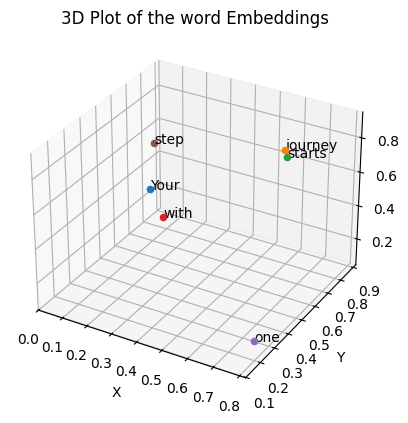

In [53]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

words=['Your','journey','starts','with','one','step']

x_coords=inputs[:, 0].numpy()
y_coords=inputs[:, 1].numpy()
z_coords=inputs[:, 2].numpy()

fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")

for x,y,z, word in zip(x_coords,y_coords,z_coords,words):
  ax.scatter(x,y,z)
  ax.text(x,y,z,word,fontsize=10)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of the word Embeddings')
plt.show()



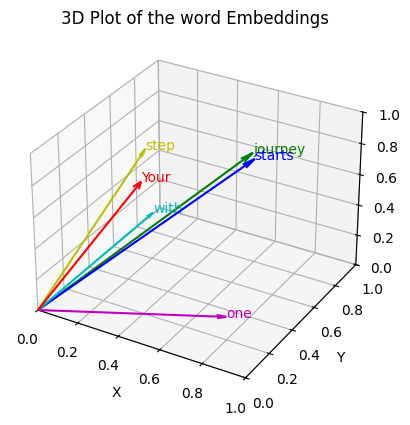

In [54]:
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")

colors=['r','g','b','c','m','y']

for x,y,z,word,color in zip(x_coords,y_coords,z_coords,words,colors):
  ax.quiver(0,0,0,x,y,z,color=color,arrow_length_ratio=0.05)
  ax.text(x,y,z,word,fontsize=10,color=color)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_zlim([0,1])

plt.title('3D Plot of the word Embeddings')
plt.show()

In [55]:
query=inputs[1]

attention_scores2=torch.empty(inputs.shape[0])

for i,x_i in enumerate(inputs):
  attention_scores2[i]=torch.dot(x_i,query)

print(attention_scores2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In [59]:
attention_weights_2_tmp=attention_scores2/attention_scores2.sum()
print("Attention weights after normalisation:\n",attention_weights_2_tmp)
print("Sum: ", attention_weights_2_tmp.sum())

Attention weights after normalisation:
 tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum:  tensor(1.0000)


In [60]:
def softmax_naive(x):
  return torch.exp(x)/torch.exp(x).sum(dim=0)

  """
  e^x/sum of all e^x
  """

attention_weights_2_naive=softmax_naive(attention_scores2)

print("Attention weights after naive softmax:\n",attention_weights_2_naive)
print("Sum: ",attention_weights_2_naive.sum())

Attention weights after naive softmax:
 tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum:  tensor(1.)


In [62]:
attention_weights_2=torch.softmax(attention_scores2,dim=0)
"""
e^(x-max(x))/sum of all e^(x-max(x))
"""
print("Attention scores after pytorch softmax:\n",attention_weights_2)
print("Sum: ",attention_weights_2.sum())

Attention scores after pytorch softmax:
 tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum:  tensor(1.)
